# MINI Project 2 -- Epidemic simulation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from epidemics_1 import SIR
%matplotlib inline

In [2]:
S, I, R, t = SIR(S0=995, I0=5, R0=0, a=0.0005, b=1 / 7, T=40)


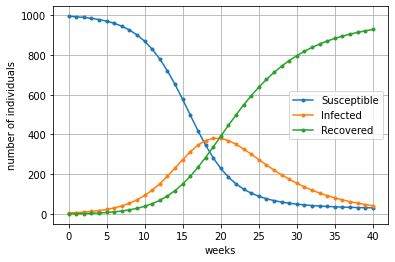

In [3]:
fig, ax = plt.subplots()
ax.plot(t, S, marker=".", linestyle="-", label="Susceptible")
ax.plot(t, I, marker=".", linestyle="-", label="Infected")
ax.plot(t, R, marker=".", linestyle="-", label="Recovered")
ax.set(
    xlabel="weeks", ylabel="number of individuals", title="",
)
ax.legend()
ax.grid()
plt.show()


In [4]:
D = np.diff(R, prepend=0) * 0.9


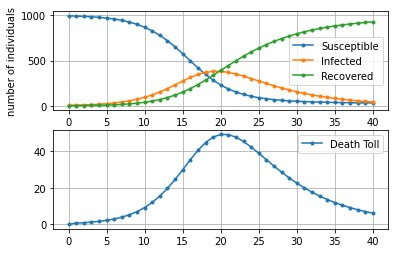

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=2)

ax1.plot(t, S, marker=".", linestyle="-", label="Susceptible")
ax1.plot(t, I, marker=".", linestyle="-", label="Infected")
ax1.plot(t, R, marker=".", linestyle="-", label="Recovered")
ax1.set(
    xlabel="weeks", ylabel="number of individuals", title="",
)
ax1.legend()
ax1.grid()

ax2.plot(t[: len(D)], D, marker=".", linestyle="-", label="Death Toll")
ax2.legend()
ax2.grid()
plt.show()


In [6]:
T = R - np.cumsum(D)


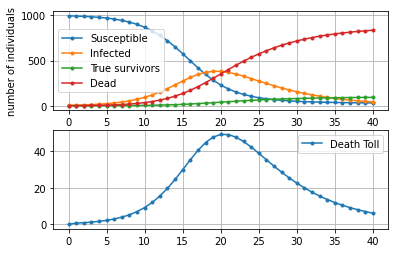

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=2)

ax1.plot(t, S, marker=".", linestyle="-", label="Susceptible")
ax1.plot(t, I, marker=".", linestyle="-", label="Infected")
ax1.plot(t, T, marker=".", linestyle="-", label="True survivors")
ax1.plot(t, np.cumsum(D), marker=".", linestyle="-", label="Dead")
ax1.set(
    xlabel="weeks", ylabel="number of individuals", title="",
)
ax1.legend()
ax1.grid()

ax2.plot(t, D, marker=".", linestyle="-", label="Death Toll")
ax2.legend()
ax2.grid()
plt.show()


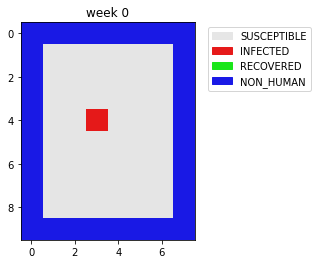

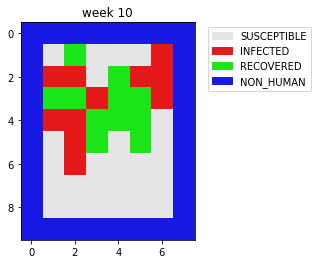

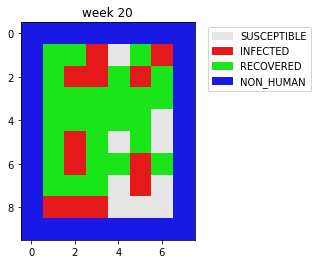

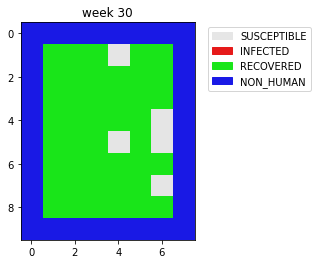

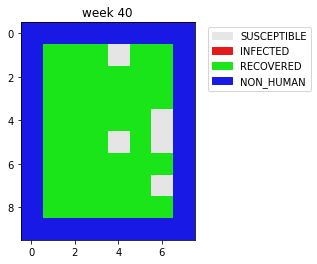

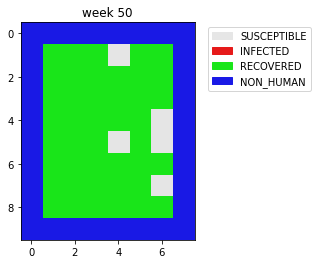

[None, None, None, None, None, None]

In [8]:
from epidemics import *
import numpy as np

# a seed for random number generators, this is not necessary
np.random.seed(1203)

# Settings
T = 50
M = 8
N = 6
alpha = 0.2
beta = 0.15

# Initialize the grid
grid = createSIR2D(rows=M, columns=N, boundary=True)
grid[4, 3] = INFECTED
grids = []
grids.append(grid)

# Run the simulation
for n in range(T):
    grid = time_step(grid, alpha, beta)
    grids.append(grid)

# Plot the results
[plot2D_SIR(grids[t], title=f'week {t}',do_show=True) for t in np.arange(0,T+1,T//5)]



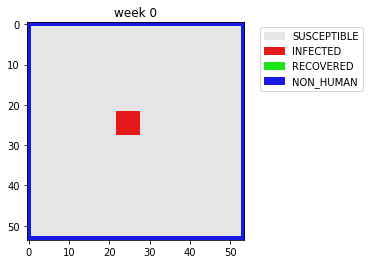

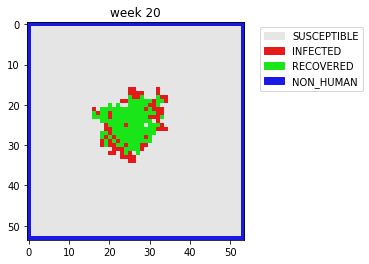

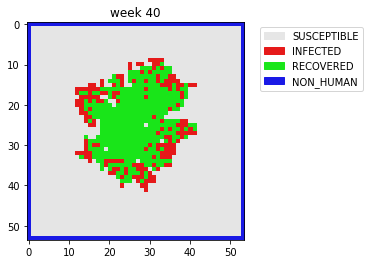

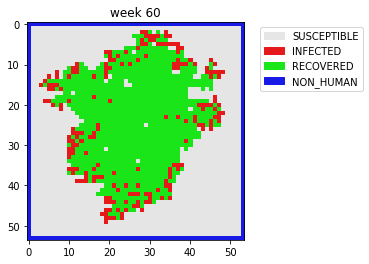

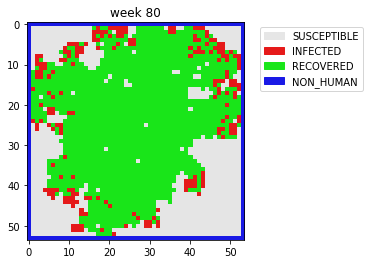

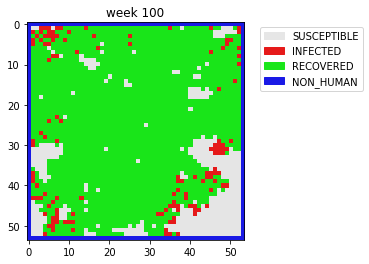

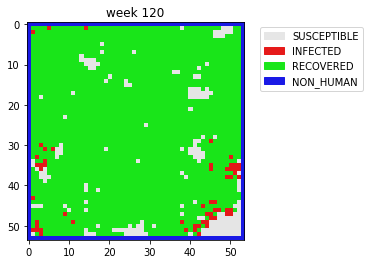

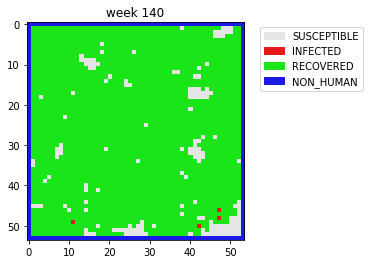

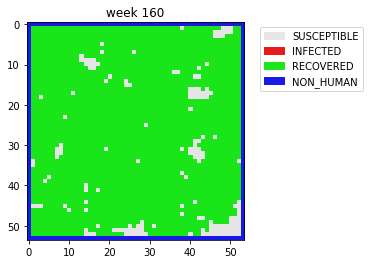

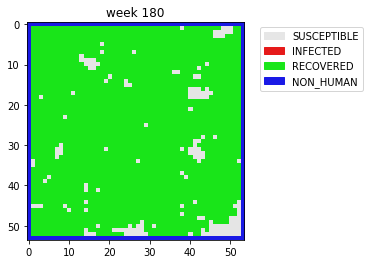

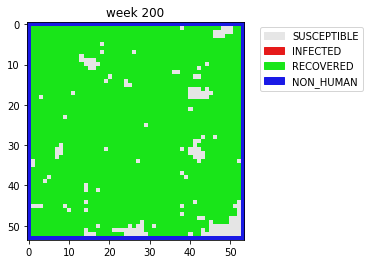

[None, None, None, None, None, None, None, None, None, None, None]

In [9]:
from epidemics import *
import numpy as np

T=200
M=52
N=52
alpha = 0.2
beta = 0.15

grid = createSIR2D(rows=M, columns=N, boundary=True)
grid[22:28, 22:28] = INFECTED
grids = []
S_list=[]
I_list=[]
R_list=[]
grids.append(grid)

# Run the simulation
for n in range(T):
    grid = time_step(grid, alpha, beta)
    grids.append(grid)
    S_list.append(np.sum(grid == SUSCEPTIBLE))
    I_list.append(np.sum(grid == INFECTED))
    R_list.append(np.sum(grid == RECOVERED))


    
[plot2D_SIR(grids[t], title=f'week {t}',do_show=True) for t in np.arange(0,T+1,T//10)]

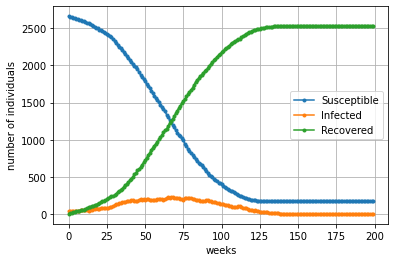

In [10]:
fig, ax = plt.subplots()
ax.plot(range(T), S_list, marker=".", linestyle="-", label="Susceptible")
ax.plot(range(T), I_list, marker=".", linestyle="-", label="Infected")
ax.plot(range(T), R_list, marker=".", linestyle="-", label="Recovered")
ax.set(
    xlabel="weeks", ylabel="number of individuals", title="",
)
ax.legend()
ax.grid()
plt.show()



In [11]:
cgrid = np.loadtxt('./data/worldmapCoarse.dat', dtype=int, delimiter=',')
cgrid.shape

(50, 100)

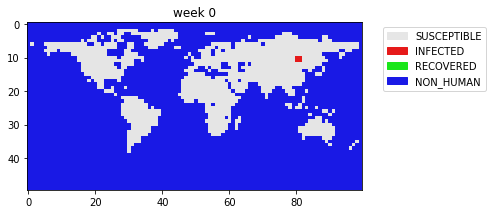

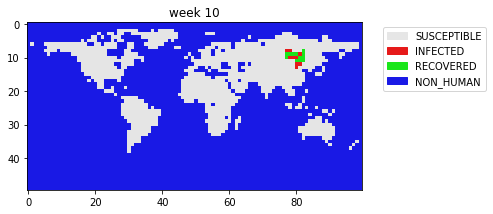

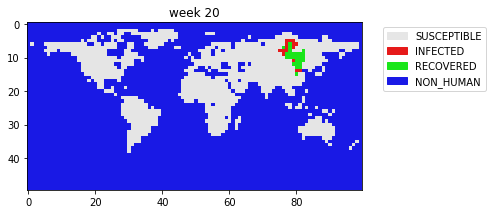

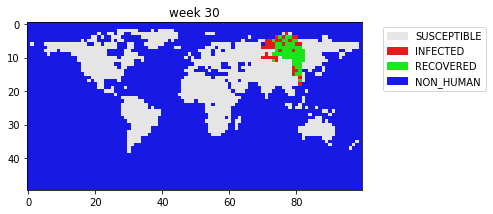

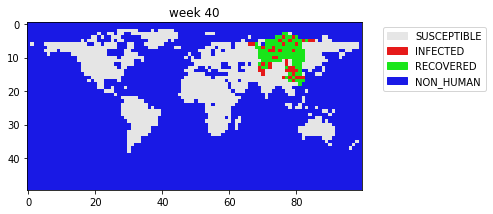

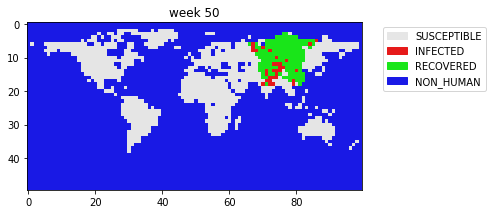

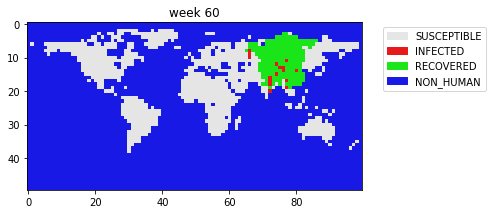

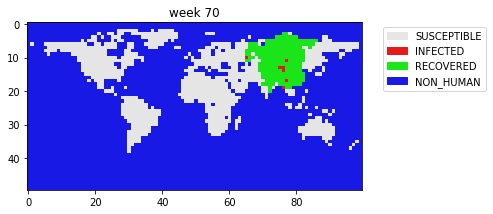

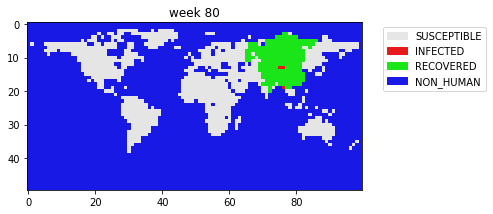

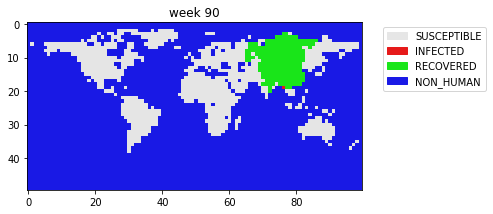

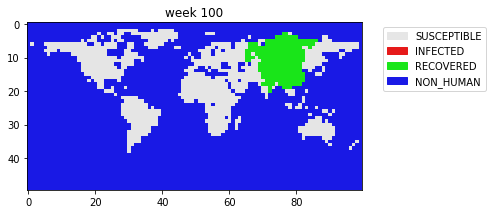

[None, None, None, None, None, None, None, None, None, None, None]

In [12]:
T=100

alpha = 0.2
beta = 0.15

cgrid[10:12, 80:82] = INFECTED

cgrids = []
cgrids.append(cgrid)
for n in range(T):
    cgrid = time_step(cgrid, alpha, beta)
    cgrids.append(cgrid)
    S_list.append(np.sum(cgrid == SUSCEPTIBLE))
    I_list.append(np.sum(cgrid == INFECTED))
    R_list.append(np.sum(cgrid == RECOVERED))


    
[plot2D_SIR(cgrids[t], title=f'week {t}',do_show=True) for t in np.arange(0,T+1,T//10)]

In [29]:
fgrid = np.loadtxt('./data/worldmap.dat', dtype=int, delimiter=',')
fgrid.shape

(200, 400)

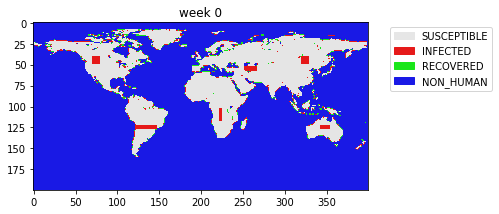

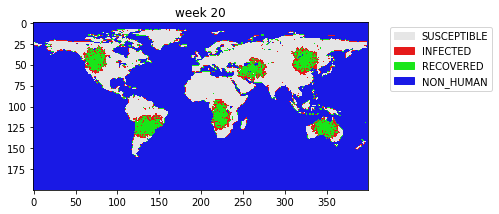

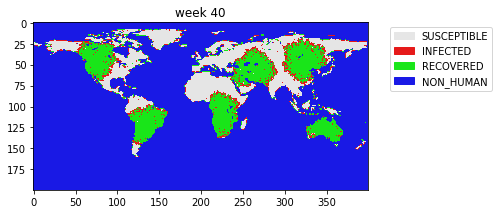

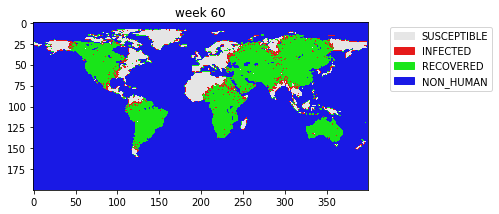

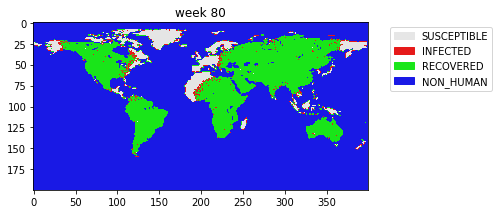

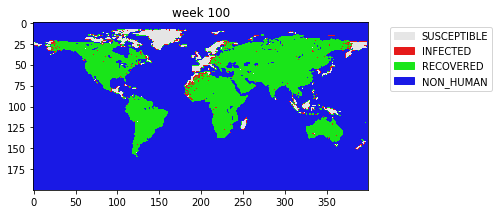

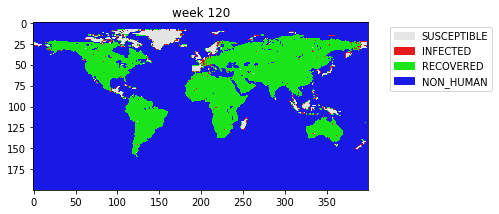

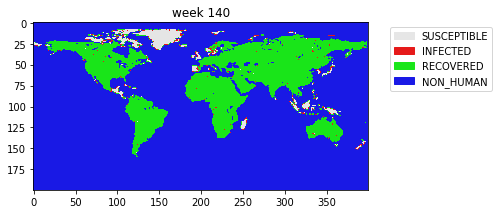

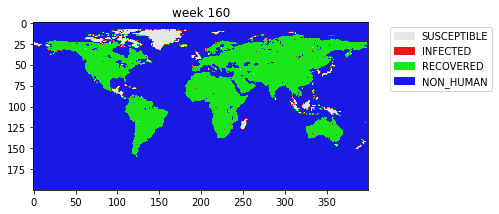

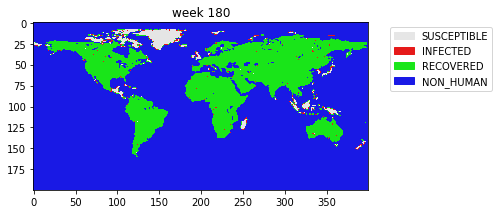

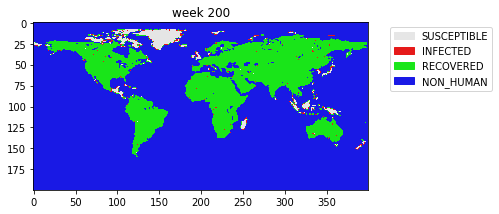

[None, None, None, None, None, None, None, None, None, None, None]

In [30]:
T=200

alpha = 0.35
beta = 0.15

fgrid[40:50, 320:330] = INFECTED
fgrid[40:50, 70:80] = INFECTED
fgrid[122:128,122:148] = INFECTED
fgrid[102:118,222:226] = INFECTED
fgrid[122:128,342:355] = INFECTED
fgrid[52:58,252:268] = INFECTED





fgrids = []
fgrids.append(fgrid)
for n in range(T):
    fgrid = time_step(fgrid, alpha, beta)
    fgrids.append(fgrid)

    
[plot2D_SIR(fgrids[t], title=f'week {t}',do_show=True) for t in np.arange(0,T+1,T//10)]